# viagogo case study: code

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from operator import itemgetter

## import data to pandas dataframe

In [118]:
df = pd.read_csv('data.csv')

## reformat data

### convert single channel col to multiple boolean cols

In [119]:
channels = list(df['Channel'].unique())
channels

['Affiliate', 'Direct', 'Email', 'Paid Search', 'SEO', 'Social Media']

In [120]:
for channel in df['Channel'].unique():
    
    df[channel] = df['Channel'].copy()
    
    for index in df.index:
        
        df[channel][index] = (df['Channel'][index] == channel)*1
        
    df[channel] = df[channel].astype('int64')

df = df.drop(columns = ['Channel'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


### convert usertype to boolean

In [121]:
df['new_user'] = df['User Type'].copy()

for index in df.index:
    
    df['new_user'][index] = (df['User Type'][index] == 'New User')*1
    
df['new_user'] = df['new_user'].astype('int64')
    
df = df.drop(columns=['User Type'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


### view updated data

In [122]:
df

,Date,Land,Bounce,Purchase,Visitors_Control,Visitors_Variant,Affiliate,Direct,Email,Paid Search,SEO,Social Media,new_user
0,2014-10-10,0,0,0,1211,1175,1,0,0,0,0,0,0
1,2014-10-10,1,0,0,4076,4810,1,0,0,0,0,0,0
2,2014-10-10,1,1,0,2766,3386,1,0,0,0,0,0,0
3,2014-10-10,0,0,1,196,159,1,0,0,0,0,0,0
4,2014-10-10,1,0,1,358,332,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,2014-10-30,0,0,0,492,469,0,0,0,0,0,1,1
1256,2014-10-30,1,0,0,1640,1816,0,0,0,0,0,1,1
1257,2014-10-30,1,1,0,1466,1226,0,0,0,0,0,1,1
1258,2014-10-30,0,0,1,47,49,0,0,0,0,0,1,1


In [7]:
df.describe()

,Land,Bounce,Purchase,Visitors_Control,Visitors_Variant,Affiliate,Direct,Email,Paid Search,SEO,Social Media,new_user
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,0.600000,0.200000,0.400000,2378.045238,2417.343651,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.500000
std,0.490092,0.400159,0.490092,3218.435287,3270.830372,0.372826,0.372826,0.372826,0.372826,0.372826,0.372826,0.500199
min,0.000000,0.000000,0.000000,30.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,265.500000,260.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1091.500000,1070.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,1.000000,0.000000,1.000000,2993.750000,2995.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,19938.000000,19045.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 1) Conversion Rate: control vs variant

### control

In [8]:
all_control = sum(df['Visitors_Control'])
converted_control = sum(df[df['Purchase'] == 1]['Visitors_Control'])
convrate_control = converted_control/all_control; convrate_control

0.05558219919855477

### variant

In [9]:
all_variant = sum(df['Visitors_Variant'])
converted_variant = sum(df[df['Purchase'] == 1]['Visitors_Variant'])
convrate_variant = converted_variant/all_variant; convrate_variant

0.05305114856166729

### variant - control difference

In [10]:
convrate_variant - convrate_control

-0.0025310506368874802

### variant/control ratio

In [11]:
convrate_variant/convrate_control

0.9544629274590976

### line plot

In [12]:
control_visits = np.array([sum(df[df['Date'] == date]['Visitors_Control']) for date in df['Date'].unique()])
variant_visits = np.array([sum(df[df['Date'] == date]['Visitors_Variant']) for date in df['Date'].unique()])

control_convs = np.array([sum(df[(df['Date'] == date) & (df['Purchase'] == 1)]['Visitors_Control']) for date in df['Date'].unique()])
variant_convs = np.array([sum(df[(df['Date'] == date) & (df['Purchase'] == 1)]['Visitors_Variant']) for date in df['Date'].unique()])

conv_df = pd.DataFrame({'day':list(range(len(df['Date'].unique()))), 'control':control_convs/control_visits, 'variant':variant_convs/variant_visits})

In [13]:
conv_df.describe()

,day,control,variant
count,21.000000,21.000000,21.000000
mean,10.000000,0.055613,0.053106
std,6.204837,0.012367,0.012792
min,0.000000,0.039739,0.038049
25%,5.000000,0.046462,0.044149
50%,10.000000,0.054468,0.051627
75%,15.000000,0.060127,0.057487
max,20.000000,0.097322,0.097641


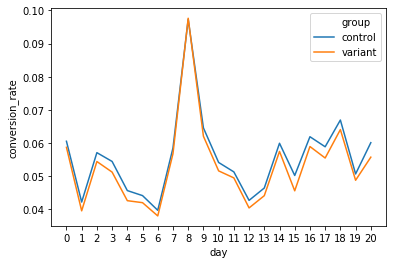

In [14]:
ax = sns.lineplot(x='day', y='conversion_rate', hue='group', data=pd.melt(conv_df, id_vars=['day'], var_name='group', value_name='conversion_rate'))
ax.set_xticks(range(21));
ax.set_xticklabels(list(range(0,21,1)));

In [ ]:
ax.get_figure().savefig('conversion.png')

### statistical significance: chi-square test
without splitting each control/variant group into subsets, the lower conversion rate in the variant is statistically significant

In [16]:
phat = (converted_control+converted_variant) / (all_control+all_variant)

O = np.array([all_control-converted_control,converted_control,all_variant-converted_variant,converted_variant])
T = np.array([all_control*(1-phat),all_control*phat,all_variant*(1-phat),all_variant*phat])

D = np.sum(np.square(T-O)/T)

pvalue = stats.chi2.sf(D, df=1)

print("distance d: {0}\np-value: {1}".format(D,pvalue))

distance d: 188.4109566873264
p-value: 7.066304522728502e-43


### generate table

In [ ]:
columns = ['Group','Rate','Variant-Control', 'Variant/Control','P-Value']
control = ['Control',convrate_control,]

# 2) Bounce Rate: control vs variant

### control

In [17]:
all_control = sum(df['Visitors_Control'])
bounce_control = sum(df[df['Bounce'] == 1]['Visitors_Control'])
bouncerate_control = bounce_control/all_control; bouncerate_control

0.3447419298964035

### variant

In [18]:
all_variant = sum(df['Visitors_Variant'])
bounce_variant = sum(df[df['Bounce'] == 1]['Visitors_Variant'])
bouncerate_variant = bounce_variant/all_variant; bouncerate_variant

0.3593134665395868

### variant - control difference

In [58]:
bouncerate_variant - bouncerate_control

0.01457153664318328

### variant/control ratio

In [123]:
bouncerate_variant/bouncerate_control

1.042267955764946

### line plot

In [21]:
control_visits = np.array([sum(df[df['Date'] == date]['Visitors_Control']) for date in df['Date'].unique()])
variant_visits = np.array([sum(df[df['Date'] == date]['Visitors_Variant']) for date in df['Date'].unique()])

control_bounces = np.array([sum(df[(df['Date'] == date) & (df['Bounce'] == 1)]['Visitors_Control']) for date in df['Date'].unique()])
variant_bounces = np.array([sum(df[(df['Date'] == date) & (df['Bounce'] == 1)]['Visitors_Variant']) for date in df['Date'].unique()])

conv_df = pd.DataFrame({'day':list(range(len(df['Date'].unique()))), 'control':control_bounces/control_visits, 'variant':variant_bounces/variant_visits})

In [22]:
conv_df.describe()

,day,control,variant
count,21.000000,21.000000,21.000000
mean,10.000000,0.344371,0.358844
std,6.204837,0.039661,0.041663
min,0.000000,0.246674,0.249624
25%,5.000000,0.322408,0.333533
50%,10.000000,0.341589,0.356583
75%,15.000000,0.368699,0.383660
max,20.000000,0.416608,0.431499


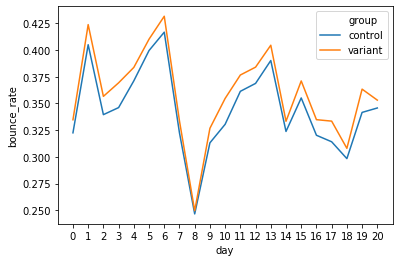

In [23]:
ax = sns.lineplot(x='day', y='bounce_rate', hue='group', data=pd.melt(conv_df, id_vars=['day'], var_name='group', value_name='bounce_rate'))
ax.set_xticks(range(21));
ax.set_xticklabels(list(range(0,21,1)));

In [ ]:
ax.get_figure().savefig('bounce.png')

### statistical significance: chi-square test
without splitting the control/variant groups into subsets, the higher bounce rate in the variant is statistically significant

In [25]:
phat = (bounce_control+bounce_variant) / (all_control+all_variant)

O = np.array([all_control-bounce_control,bounce_control,all_variant-bounce_variant,bounce_variant])
T = np.array([all_control*(1-phat),all_control*phat,all_variant*(1-phat),all_variant*phat])

D = np.sum(np.square(T-O)/T)

pvalue = stats.chi2.sf(D, df=1)

print("distance d: {0}\np-value: {1}".format(D,pvalue))

distance d: 1405.882458194404
p-value: 1.1070322968182451e-307


## chi-square: for a given subset/metric

In [26]:
def chi_square(metric,channel,land,new_user,df):
    
    df = df[(df[channel]==1) & (df['new_user']==new_user) & (df['Land']==land)]
    
    all_control = sum(df['Visitors_Control'])
    act_control = sum(df[df[metric] == 1]['Visitors_Control'])
    rate_control = act_control/all_control
    
    all_variant = sum(df['Visitors_Variant'])
    act_variant = sum(df[df[metric] == 1]['Visitors_Variant'])
    rate_variant = act_variant/all_variant
    
    phat = (act_control+act_variant) / (all_control+all_variant)

    O = np.array([all_control-act_control,act_control,all_variant-act_variant,act_variant])
    T = np.array([all_control*(1-phat),all_control*phat,all_variant*(1-phat),all_variant*phat])

    D = np.sum(np.square(T-O)/T)

    pvalue = stats.chi2.sf(D, df=1)
    
    try:
        ratio = rate_variant/rate_control
    except:
        ratio = None
        pvalue = None
    
    return pvalue,ratio

## Create Dataframe to summarize significance

In [59]:
chi_square_data = []

for channel in channels:
    
    for land in [0,1]:
        
        for new_user in [0,1]:
            
            b_pvalue,b_ratio = chi_square('Bounce',channel,land,new_user,df)
            c_pvalue,c_ratio = chi_square('Purchase',channel,land,new_user,df)
            
            chi_square_data += [[new_user,land,channel,c_ratio,c_pvalue,b_ratio,b_pvalue]]

chi_square_data = sorted(chi_square_data,key=itemgetter(1,0,2),reverse=False)
            
df_stat = pd.DataFrame(data=chi_square_data,columns=['new_user','land','channel','conv_rate ratio (variant/control)','conv_pvalue','bounce_rate ratio (variant/control)','bounce_pvalue'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


In [60]:
df_stat

,new_user,land,channel,conv_rate ratio (variant/control),conv_pvalue,bounce_rate ratio (variant/control),bounce_pvalue
0,0,0,Affiliate,1.044200,8.725576e-02,NaN,NaN
1,0,0,Direct,0.923416,2.237711e-05,NaN,NaN
2,0,0,Email,0.950100,1.365877e-01,NaN,NaN
3,0,0,Paid Search,0.957468,1.669638e-01,NaN,NaN
4,0,0,SEO,0.966234,1.429692e-01,NaN,NaN
5,0,0,Social Media,0.950775,1.826116e-01,NaN,NaN
6,1,0,Affiliate,0.977987,3.533897e-01,NaN,NaN
7,1,0,Direct,0.947334,9.395473e-04,NaN,NaN
8,1,0,Email,0.965764,3.587866e-01,NaN,NaN
9,1,0,Paid Search,0.988299,6.996750e-01,NaN,NaN


In [127]:
df_stat.fillna(value='-').to_html().replace('\n','')

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>new_user</th>      <th>land</th>      <th>channel</th>      <th>conv_rate ratio (variant/control)</th>      <th>conv_pvalue</th>      <th>bounce_rate ratio (variant/control)</th>      <th>bounce_pvalue</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>0</td>      <td>0</td>      <td>Affiliate</td>      <td>1.044200</td>      <td>8.725576e-02</td>      <td>-</td>      <td>-</td>    </tr>    <tr>      <th>1</th>      <td>0</td>      <td>0</td>      <td>Direct</td>      <td>0.923416</td>      <td>2.237711e-05</td>      <td>-</td>      <td>-</td>    </tr>    <tr>      <th>2</th>      <td>0</td>      <td>0</td>      <td>Email</td>      <td>0.950100</td>      <td>1.365877e-01</td>      <td>-</td>      <td>-</td>    </tr>    <tr>      <th>3</th>      <td>0</td>      <td>0</td>      <td>Paid Search</td>      <td>0.957468</td>      <td>1.669638e-01</td>      <td>-</td>      

## subsets by type

### control strongly better (significantly better conversion and bounce rates)

In [125]:
df_fillna = df_stat.fillna(value=0)

df_fillna = df_fillna[
    (df_fillna['conv_rate ratio (variant/control)'] < 1) &
    (df_fillna['conv_pvalue'] < .05) &
    
    ((df_fillna['bounce_rate ratio (variant/control)'] == 0) |
     
     ((df_fillna['bounce_rate ratio (variant/control)'] > 1) &
     (df_fillna['bounce_pvalue'] < .05)
     )
     
    )
    
]

df_stat.iloc[list(df_fillna.index)].fillna('-')

,new_user,land,channel,conv_rate ratio (variant/control),conv_pvalue,bounce_rate ratio (variant/control),bounce_pvalue
1,0,0,Direct,0.923416,2.237711e-05,-,-
7,1,0,Direct,0.947334,9.395473e-04,-,-
10,1,0,SEO,0.944070,4.490929e-03,-,-
12,0,1,Affiliate,0.920976,2.677102e-08,1.02758,6.56885e-11
13,0,1,Direct,0.932118,2.188615e-13,1.06264,6.72296e-112
14,0,1,Email,0.943150,7.038769e-03,1.05008,3.19279e-13
15,0,1,Paid Search,0.870167,1.481293e-14,1.03137,3.14846e-09
16,0,1,SEO,0.925030,5.438949e-10,1.01697,9.68093e-07
19,1,1,Direct,0.943457,2.208568e-12,1.04781,8.349e-95
20,1,1,Email,0.939848,1.407659e-03,1.0339,1.2157e-10


In [128]:
df_stat.iloc[list(df_fillna.index)].fillna('-').to_html().replace('\n','')

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>new_user</th>      <th>land</th>      <th>channel</th>      <th>conv_rate ratio (variant/control)</th>      <th>conv_pvalue</th>      <th>bounce_rate ratio (variant/control)</th>      <th>bounce_pvalue</th>    </tr>  </thead>  <tbody>    <tr>      <th>1</th>      <td>0</td>      <td>0</td>      <td>Direct</td>      <td>0.923416</td>      <td>2.237711e-05</td>      <td>-</td>      <td>-</td>    </tr>    <tr>      <th>7</th>      <td>1</td>      <td>0</td>      <td>Direct</td>      <td>0.947334</td>      <td>9.395473e-04</td>      <td>-</td>      <td>-</td>    </tr>    <tr>      <th>10</th>      <td>1</td>      <td>0</td>      <td>SEO</td>      <td>0.944070</td>      <td>4.490929e-03</td>      <td>-</td>      <td>-</td>    </tr>    <tr>      <th>12</th>      <td>0</td>      <td>1</td>      <td>Affiliate</td>      <td>0.920976</td>      <td>2.677102e-08</td>      <td>1.02758</td>     

### variant strongly better (significantly better conversion and bounce rates)

In [129]:
df_fillna = df_stat.fillna(value=0)

df_fillna = df_fillna[
    (df_fillna['conv_rate ratio (variant/control)'] > 1) &
    (df_fillna['conv_pvalue'] < .05) &
    
    ((df_fillna['bounce_rate ratio (variant/control)'] == 0) |
     
     (
     (df_fillna['bounce_rate ratio (variant/control)'] != 0 ) &
     (df_fillna['bounce_rate ratio (variant/control)'] < 1 ) &
     (df_fillna['bounce_pvalue'] < .05)
     )
     
    )
    
]

df_stat.iloc[list(df_fillna.index)].fillna('-')

,new_user,land,channel,conv_rate ratio (variant/control),conv_pvalue,bounce_rate ratio (variant/control),bounce_pvalue


### control: (better conversion rate, worse/inconclusive bounce rate)

In [130]:
df_fillna = df_stat.fillna(value=0)

df_fillna = df_fillna[
    (df_fillna['conv_rate ratio (variant/control)'] > 1) &
    (df_fillna['conv_pvalue'] < .05) &
    
    (df_fillna['bounce_rate ratio (variant/control)'] != 0 ) &
    (df_fillna['bounce_rate ratio (variant/control)'] < 1 ) &
    (df_fillna['bounce_pvalue'] < .05)
    
]

df_stat.iloc[list(df_fillna.index)].fillna('-')

,new_user,land,channel,conv_rate ratio (variant/control),conv_pvalue,bounce_rate ratio (variant/control),bounce_pvalue


### variant: (better conversion rate, worse/inconclusive bounce rate)

In [132]:
df_stat[(df_stat['conv_pvalue']<.05) & (df_stat['conv_rate ratio (variant/control)']>1)]

,new_user,land,channel,conv_rate ratio (variant/control),conv_pvalue,bounce_rate ratio (variant/control),bounce_pvalue
18,1,1,Affiliate,1.033099,0.006762,1.019774,3.336166e-09


In [133]:
df_stat[(df_stat['conv_pvalue']<.05) & (df_stat['conv_rate ratio (variant/control)']>1)].fillna('-').to_html().replace('\n','')

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>new_user</th>      <th>land</th>      <th>channel</th>      <th>conv_rate ratio (variant/control)</th>      <th>conv_pvalue</th>      <th>bounce_rate ratio (variant/control)</th>      <th>bounce_pvalue</th>    </tr>  </thead>  <tbody>    <tr>      <th>18</th>      <td>1</td>      <td>1</td>      <td>Affiliate</td>      <td>1.033099</td>      <td>0.006762</td>      <td>1.019774</td>      <td>3.336166e-09</td>    </tr>  </tbody></table>'

### need more data: conversion pvalue inconclusive

In [136]:
df_stat[df_stat['conv_pvalue']>.05].fillna('-')

,new_user,land,channel,conv_rate ratio (variant/control),conv_pvalue,bounce_rate ratio (variant/control),bounce_pvalue
0,0,0,Affiliate,1.044200,0.087256,-,-
2,0,0,Email,0.950100,0.136588,-,-
3,0,0,Paid Search,0.957468,0.166964,-,-
4,0,0,SEO,0.966234,0.142969,-,-
5,0,0,Social Media,0.950775,0.182612,-,-
6,1,0,Affiliate,0.977987,0.353390,-,-
8,1,0,Email,0.965764,0.358787,-,-
9,1,0,Paid Search,0.988299,0.699675,-,-
11,1,0,Social Media,1.050713,0.257029,-,-
17,0,1,Social Media,1.025623,0.285743,1.07896,5.75997e-24


In [135]:
df_stat[df_stat['conv_pvalue']>.05].fillna('-').to_html().replace('\n','')

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>new_user</th>      <th>land</th>      <th>channel</th>      <th>conv_rate ratio (variant/control)</th>      <th>conv_pvalue</th>      <th>bounce_rate ratio (variant/control)</th>      <th>bounce_pvalue</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>0</td>      <td>0</td>      <td>Affiliate</td>      <td>1.044200</td>      <td>0.087256</td>      <td>-</td>      <td>-</td>    </tr>    <tr>      <th>2</th>      <td>0</td>      <td>0</td>      <td>Email</td>      <td>0.950100</td>      <td>0.136588</td>      <td>-</td>      <td>-</td>    </tr>    <tr>      <th>3</th>      <td>0</td>      <td>0</td>      <td>Paid Search</td>      <td>0.957468</td>      <td>0.166964</td>      <td>-</td>      <td>-</td>    </tr>    <tr>      <th>4</th>      <td>0</td>      <td>0</td>      <td>SEO</td>      <td>0.966234</td>      <td>0.142969</td>      <td>-</td>      <td>-</td>    </tr>